In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import joblib

In [ ]:
#IMPORTANT!!!
#Exécuter cette cellule si on est sur google colab

from google.colab import files
data_to_load = files.upload()

Saving data_merge_v2.csv to data_merge_v2.csv


In [ ]:
#IMPORTANT!!!
#Exécuter cette cellule si on est sur google colab

import io
df = pd.read_csv(io.BytesIO(data_to_load['data_merge_v2.csv']))

print(df.shape)
print(df.columns)
print(df.head())
print(df.info())

(5890, 29)
Index(['lib_mrq', 'lib_mod_doss', 'lib_mod', 'dscom', 'cod_cbr', 'hybride',
       'puiss_admin_98', 'puiss_max', 'conso_urb', 'conso_exurb',
       'conso_mixte', 'co2', 'co_typ_1', 'nox', 'ptcl', 'masse_ordma_min',
       'masse_ordma_max', 'champ_v9', 'Carrosserie', 'gamme', 'Mp', 'Ct',
       'W (mm)', 'At1 (mm)', 'At2 (mm)', 'ec (cm3)', 'typ_boite', 'nb_rapp',
       'category'],
      dtype='object')
      lib_mrq lib_mod_doss    lib_mod                        dscom cod_cbr  \
0  ALFA-ROMEO          159        159         159 2.0 JTDm (170ch)      GO   
1  ALFA-ROMEO          159        159     159 2.0 JTDm (170ch) ECO      GO   
2  ALFA-ROMEO          159        159      159 SW 2.0 JTDm (170ch)      GO   
3  ALFA-ROMEO          159        159  159 SW 2.0 JTDm (170ch) ECO      GO   
4  ALFA-ROMEO  AR8C SPIDER  8C SPIDER                    8C SPIDER      ES   

  hybride  puiss_admin_98  puiss_max  conso_urb  conso_exurb  ...      gamme  \
0     non               9     

In [ ]:
#IMPORTANT!!!
#Exécuter cette cellule si on est PAS sur google colab

df = pd.read_csv("../data/Processed/data_merge_v2.csv")

print(df.shape)
print(df.columns)
print(df.head())
print(df.info())

(5890, 29)
Index(['lib_mrq', 'lib_mod_doss', 'lib_mod', 'dscom', 'cod_cbr', 'hybride',
       'puiss_admin_98', 'puiss_max', 'conso_urb', 'conso_exurb',
       'conso_mixte', 'co2', 'co_typ_1', 'nox', 'ptcl', 'masse_ordma_min',
       'masse_ordma_max', 'champ_v9', 'Carrosserie', 'gamme', 'Mp', 'Ct',
       'W (mm)', 'At1 (mm)', 'At2 (mm)', 'ec (cm3)', 'typ_boite', 'nb_rapp',
       'category'],
      dtype='object')
      lib_mrq lib_mod_doss    lib_mod                        dscom cod_cbr  \
0  ALFA-ROMEO          159        159         159 2.0 JTDm (170ch)      GO   
1  ALFA-ROMEO          159        159     159 2.0 JTDm (170ch) ECO      GO   
2  ALFA-ROMEO          159        159      159 SW 2.0 JTDm (170ch)      GO   
3  ALFA-ROMEO          159        159  159 SW 2.0 JTDm (170ch) ECO      GO   
4  ALFA-ROMEO  AR8C SPIDER  8C SPIDER                    8C SPIDER      ES   

  hybride  puiss_admin_98  puiss_max  conso_urb  conso_exurb   ...     \
0     non               9      125.0 

**Etude 1**

Dans cette première étude, on va juste tester des modèles simples sur les variables conso_mixte, puiss_max et ec (cm3)

**Only "conso_mixte"**

In [ ]:
X = df[["conso_mixte"]]

y = df["category"].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])

print(X.head())
print(y.head())

   conso_mixte
0     5.300000
1     5.100000
2     5.400000
3     5.200000
4    16.299999
0    2
1    2
2    3
3    2
4    6
Name: category, dtype: int64


<ipython-input-7-076e0a1f469a>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df["category"].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=64)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [ ]:
clf = LogisticRegression(C=1)
clf.fit(X_train_scaler,y_train)

print("Logistic Regression",clf.score(X_train_scaler,y_train))
print("Logistic Regression",clf.score(X_test_scaler,y_test))

y_pred = clf.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

Logistic Regression 0.7389643463497453
Logistic Regression 0.7784380305602716
              precision    recall  f1-score   support

           0       0.86      0.79      0.83       145
           1       0.85      0.87      0.86       340
           2       0.83      0.80      0.81       298
           3       0.59      0.76      0.66       211
           4       0.76      0.55      0.64       161
           5       0.85      0.79      0.81        14
           6       1.00      0.78      0.88         9

    accuracy                           0.78      1178
   macro avg       0.82      0.76      0.78      1178
weighted avg       0.79      0.78      0.78      1178

col_0       0    1    2    3   4   5  6
category                               
0         115   30    0    0   0   0  0
1          18  297   23    1   1   0  0
2           0   22  239   37   0   0  0
3           0    0   27  160  24   0  0
4           0    0    0   73  88   0  0
5           0    0    0    0   3  11  0
6    

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaler,y_train)

print(knn.score(X_train_scaler,y_train))
print(knn.score(X_test_scaler,y_test))

y_pred = knn.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

0.8196095076400679
0.8438030560271647
              precision    recall  f1-score   support

           0       1.00      0.79      0.88       145
           1       0.91      0.91      0.91       340
           2       0.89      0.84      0.86       298
           3       0.68      0.82      0.74       211
           4       0.76      0.78      0.77       161
           5       1.00      0.93      0.96        14
           6       1.00      1.00      1.00         9

    accuracy                           0.84      1178
   macro avg       0.89      0.87      0.88      1178
weighted avg       0.86      0.84      0.85      1178

col_0       0    1    2    3    4   5  6
category                                
0         115   30    0    0    0   0  0
1           0  308   30    0    2   0  0
2           0    0  250   48    0   0  0
3           0    0    2  173   36   0  0
4           0    0    0   35  126   0  0
5           0    0    0    0    1  13  0
6           0    0    0    0    0   0

In [ ]:
rforest = RandomForestClassifier(n_jobs = -1,random_state = 64)
rforest.fit(X_train_scaler,y_train)

print(rforest.score(X_train_scaler,y_train))
print(rforest.score(X_test_scaler,y_test))

y_pred = rforest.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

0.8264006791171478
0.8421052631578947
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       145
           1       0.99      0.80      0.88       340
           2       0.89      0.84      0.86       298
           3       0.65      0.99      0.79       211
           4       0.99      0.61      0.75       161
           5       0.93      1.00      0.97        14
           6       1.00      1.00      1.00         9

    accuracy                           0.84      1178
   macro avg       0.89      0.89      0.87      1178
weighted avg       0.88      0.84      0.84      1178

col_0       0    1    2    3   4   5  6
category                               
0         141    4    0    0   0   0  0
1          37  271   30    1   1   0  0
2           0    0  250   48   0   0  0
3           0    0    2  209   0   0  0
4           0    0    0   62  98   1  0
5           0    0    0    0   0  14  0
6           0    0    0    0   0   0  9


In [ ]:
###IMPORTANT
#Comme j'effectue ces lignes sur google colab, j'utilise après la fonction
#files.download pour télécharger le modèle sur mon ordi

joblib.dump(clf, "LR_conso.pkl")
joblib.dump(knn, "KNN_conso.pkl")
joblib.dump(rforest, "RF_conso.pkl")

from google.colab import files
files.download("LR_conso.pkl")
files.download("KNN_conso.pkl")
files.download("RF_conso.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Only puiss_max**

In [ ]:
X = df[["puiss_max"]]
y = df["category"].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])

#Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=64)

#Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

###LogisticRegression
clf = LogisticRegression(C=1)
clf.fit(X_train_scaler,y_train)

print("LOGISTIC REGRESSION")
print("Logistic Regression train: ",clf.score(X_train_scaler,y_train))
print("Logistic Regression test : ",clf.score(X_test_scaler,y_test))

y_pred = clf.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaler,y_train)

print("\n\n")
print("KNN")
print("KNN train : ",knn.score(X_train_scaler,y_train))
print("KNN test : ",knn.score(X_test_scaler,y_test))

y_pred = knn.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#RandomForest
rforest = RandomForestClassifier(n_jobs = -1,random_state = 64)
rforest.fit(X_train_scaler,y_train)

print("\n\n")
print("RANDOM FOREST")
print("Random Forest train : ",rforest.score(X_train_scaler,y_train))
print("Random Forest test : ",rforest.score(X_test_scaler,y_test))

y_pred = rforest.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

<ipython-input-21-06d29ae7891b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df["category"].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

LOGISTIC REGRESSION
Logistic Regression train:  0.3622665534804754
Logistic Regression test :  0.3684210526315789
              precision    recall  f1-score   support

           0       0.41      0.32      0.36       145
           1       0.39      0.60      0.47       340
           2       0.35      0.30      0.32       298
           3       0.29      0.37      0.33       211
           4       0.00      0.00      0.00       161
           5       0.67      0.71      0.69        14
           6       1.00      0.78      0.88         9

    accuracy                           0.37      1178
   macro avg       0.44      0.44      0.44      1178
weighted avg       0.32      0.37      0.34      1178

col_0      0    1   2   3   5  6
category                        
0         47   89   0   9   0  0
1         51  204  52  33   0  0
2         18  120  88  72   0  0
3          0   78  55  78   0  0
4          0   32  52  74   3  0
5          0    0   2   2  10  0
6          0    0   0   0

In [ ]:
joblib.dump(clf, "LR_puiss.pkl")
joblib.dump(knn, "KNN_puiss.pkl")
joblib.dump(rforest, "RF_puiss.pkl")

from google.colab import files
files.download("LR_puiss.pkl")
files.download("KNN_puiss.pkl")
files.download("RF_puiss.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**ec (cm3)**

In [ ]:
X = df[["ec (cm3)"]]
y = df["category"].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])

#Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=64)

#Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

###LogisticRegression
clf = LogisticRegression(C=1)
clf.fit(X_train_scaler,y_train)

print("LOGISTIC REGRESSION")
print("Logistic Regression train: ",clf.score(X_train_scaler,y_train))
print("Logistic Regression test : ",clf.score(X_test_scaler,y_test))

y_pred = clf.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaler,y_train)

print("\n\n")
print("KNN")
print("KNN train : ",knn.score(X_train_scaler,y_train))
print("KNN test : ",knn.score(X_test_scaler,y_test))

y_pred = knn.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#RandomForest
rforest = RandomForestClassifier(n_jobs = -1,random_state = 64)
rforest.fit(X_train_scaler,y_train)

print("\n\n")
print("RANDOM FOREST")
print("Random Forest train : ",rforest.score(X_train_scaler,y_train))
print("Random Forest test : ",rforest.score(X_test_scaler,y_test))

y_pred = rforest.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

<ipython-input-23-2c14090513d0>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df["category"].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

LOGISTIC REGRESSION
Logistic Regression train:  0.3380730050933786
Logistic Regression test :  0.35823429541595925
              precision    recall  f1-score   support

           0       0.47      0.19      0.27       145
           1       0.33      0.70      0.45       340
           2       0.35      0.31      0.32       298
           3       0.00      0.00      0.00       211
           4       0.45      0.30      0.36       161
           5       0.75      0.64      0.69        14
           6       0.89      0.89      0.89         9

    accuracy                           0.36      1178
   macro avg       0.46      0.43      0.43      1178
weighted avg       0.32      0.36      0.31      1178

col_0      0    1   2   4  5  6
category                       
0         27  109   9   0  0  0
1         31  238  67   4  0  0
2          0  188  91  18  0  1
3          0  146  31  34  0  0
4          0   45  65  49  2  0
5          0    0   0   5  9  0
6          0    0   0   0  1  8


In [ ]:
joblib.dump(clf, "LR_ec.pkl")
joblib.dump(knn, "KNN_ec.pkl")
joblib.dump(rforest, "RF_ec.pkl")

files.download("LR_ec.pkl")
files.download("KNN_ec.pkl")
files.download("RF_ec.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**conso_mixte + puiss_max**

In [ ]:
X = df[["conso_mixte","puiss_max"]]
y = df["category"].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])

#Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=64)

#Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

###LogisticRegression
clf = LogisticRegression(C=1)
clf.fit(X_train_scaler,y_train)

print("LOGISTIC REGRESSION")
print("Logistic Regression train: ",clf.score(X_train_scaler,y_train))
print("Logistic Regression test : ",clf.score(X_test_scaler,y_test))

y_pred = clf.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaler,y_train)

print("\n\n")
print("KNN")
print("KNN train : ",knn.score(X_train_scaler,y_train))
print("KNN test : ",knn.score(X_test_scaler,y_test))

y_pred = knn.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#RandomForest
rforest = RandomForestClassifier(n_jobs = -1,random_state = 64)
rforest.fit(X_train_scaler,y_train)

print("\n\n")
print("RANDOM FOREST")
print("Random Forest train : ",rforest.score(X_train_scaler,y_train))
print("Random Forest test : ",rforest.score(X_test_scaler,y_test))

y_pred = rforest.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

<ipython-input-25-a4e8adfe6721>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df["category"].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])


LOGISTIC REGRESSION
Logistic Regression train:  0.7463921901528013
Logistic Regression test :  0.7809847198641766
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       145
           1       0.87      0.90      0.88       340
           2       0.87      0.82      0.84       298
           3       0.57      0.75      0.65       211
           4       0.69      0.52      0.60       161
           5       0.85      0.79      0.81        14
           6       1.00      0.78      0.88         9

    accuracy                           0.78      1178
   macro avg       0.82      0.76      0.78      1178
weighted avg       0.79      0.78      0.78      1178

col_0       0    1    2    3   4   5  6
category                               
0         109   36    0    0   0   0  0
1          15  305   18    1   1   0  0
2           0   11  245   42   0   0  0
3           0    0   19  159  33   0  0
4           0    0    0   77  84   0  0
5        

In [ ]:
joblib.dump(clf, "LR_conso_puiss.pkl")
joblib.dump(knn, "KNN_conso_puiss.pkl")
joblib.dump(rforest, "RF_conso_puiss.pkl")

from google.colab import files
files.download("LR_conso_puiss.pkl")
files.download("KNN_conso_puiss.pkl")
files.download("RF_conso_puiss.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**conso_mixte + ec (cm3)**

In [ ]:
X = df[["conso_mixte","ec (cm3)"]]
y = df["category"].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])

#Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=64)

#Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

###LogisticRegression
clf = LogisticRegression(C=1)
clf.fit(X_train_scaler,y_train)

print("LOGISTIC REGRESSION")
print("Logistic Regression train: ",clf.score(X_train_scaler,y_train))
print("Logistic Regression test : ",clf.score(X_test_scaler,y_test))

y_pred = clf.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaler,y_train)

print("\n\n")
print("KNN")
print("KNN train : ",knn.score(X_train_scaler,y_train))
print("KNN test : ",knn.score(X_test_scaler,y_test))

y_pred = knn.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#RandomForest
rforest = RandomForestClassifier(n_jobs = -1,random_state = 64)
rforest.fit(X_train_scaler,y_train)

print("\n\n")
print("RANDOM FOREST")
print("Random Forest train : ",rforest.score(X_train_scaler,y_train))
print("Random Forest test : ",rforest.score(X_test_scaler,y_test))

y_pred = rforest.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

<ipython-input-27-a582a61502d6>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df["category"].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])


LOGISTIC REGRESSION
Logistic Regression train:  0.8677843803056027
Logistic Regression test :  0.8947368421052632
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       145
           1       0.93      0.93      0.93       340
           2       0.91      0.87      0.89       298
           3       0.79      0.88      0.84       211
           4       0.88      0.87      0.88       161
           5       0.92      0.79      0.85        14
           6       0.89      0.89      0.89         9

    accuracy                           0.89      1178
   macro avg       0.90      0.88      0.89      1178
weighted avg       0.90      0.89      0.90      1178

col_0       0    1    2    3    4   5  6
category                                
0         136    9    0    0    0   0  0
1           7  315   16    2    0   0  0
2           0   14  258   25    0   0  1
3           0    0    9  186   16   0  0
4           0    0    0   21  140   0  0
5 

In [ ]:
joblib.dump(clf, "LR_conso_ec.pkl")
joblib.dump(knn, "KNN_conso_ec.pkl")
joblib.dump(rforest, "RF_conso_ec.pkl")

from google.colab import files
files.download("LR_conso_ec.pkl")
files.download("KNN_conso_ec.pkl")
files.download("RF_conso_ec.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**ec (cm3) + puiss_max**

In [ ]:
X = df[["ec (cm3)","puiss_max"]]
y = df["category"].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])

#Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=64)

#Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

###LogisticRegression
clf = LogisticRegression(C=1)
clf.fit(X_train_scaler,y_train)

print("LOGISTIC REGRESSION")
print("Logistic Regression train: ",clf.score(X_train_scaler,y_train))
print("Logistic Regression test : ",clf.score(X_test_scaler,y_test))

y_pred = clf.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaler,y_train)

print("\n\n")
print("KNN")
print("KNN train : ",knn.score(X_train_scaler,y_train))
print("KNN test : ",knn.score(X_test_scaler,y_test))

y_pred = knn.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#RandomForest
rforest = RandomForestClassifier(n_jobs = -1,random_state = 64)
rforest.fit(X_train_scaler,y_train)

print("\n\n")
print("RANDOM FOREST")
print("Random Forest train : ",rforest.score(X_train_scaler,y_train))
print("Random Forest test : ",rforest.score(X_test_scaler,y_test))

y_pred = rforest.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

<ipython-input-29-0fdab375ad9a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df["category"].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])


LOGISTIC REGRESSION
Logistic Regression train:  0.3957979626485569
Logistic Regression test :  0.4091680814940577
              precision    recall  f1-score   support

           0       0.41      0.32      0.36       145
           1       0.39      0.60      0.47       340
           2       0.37      0.26      0.30       298
           3       0.40      0.42      0.41       211
           4       0.54      0.30      0.39       161
           5       0.69      0.64      0.67        14
           6       1.00      0.89      0.94         9

    accuracy                           0.41      1178
   macro avg       0.54      0.49      0.51      1178
weighted avg       0.42      0.41      0.40      1178

col_0      0    1   2   3   4  5  6
category                           
0         47   89   6   3   0  0  0
1         51  204  60  21   4  0  0
2         18  120  77  64  18  1  0
3          0   84  24  88  15  0  0
4          0   26  42  42  49  2  0
5          0    0   0   1   4  9  0
6

In [ ]:
joblib.dump(clf, "LR_puiss_ec.pkl")
joblib.dump(knn, "KNN_puiss_ec.pkl")
joblib.dump(rforest, "RF_puiss_ec.pkl")

files.download("LR_puiss_ec.pkl")
files.download("KNN_puiss_ec.pkl")
files.download("RF_puiss_ec.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**conso_mixte + puiss_max + ec (cm3)**

In [ ]:
X = df[["conso_mixte","puiss_max","ec (cm3)"]]
y = df["category"].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])

#Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=64)

#Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

###LogisticRegression
clf = LogisticRegression(C=1)
clf.fit(X_train_scaler,y_train)

print("LOGISTIC REGRESSION")
print("Logistic Regression train: ",clf.score(X_train_scaler,y_train))
print("Logistic Regression test : ",clf.score(X_test_scaler,y_test))

y_pred = clf.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaler,y_train)

print("\n\n")
print("KNN")
print("KNN train : ",knn.score(X_train_scaler,y_train))
print("KNN test : ",knn.score(X_test_scaler,y_test))

y_pred = knn.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#RandomForest
rforest = RandomForestClassifier(n_jobs = -1,random_state = 64)
rforest.fit(X_train_scaler,y_train)

print("\n\n")
print("RANDOM FOREST")
print("Random Forest train : ",rforest.score(X_train_scaler,y_train))
print("Random Forest test : ",rforest.score(X_test_scaler,y_test))

y_pred = rforest.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

<ipython-input-31-91a4052800b9>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = df["category"].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])


LOGISTIC REGRESSION
Logistic Regression train:  0.8669354838709677
Logistic Regression test :  0.8921901528013583
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       145
           1       0.92      0.93      0.92       340
           2       0.91      0.84      0.87       298
           3       0.79      0.91      0.85       211
           4       0.90      0.87      0.89       161
           5       0.91      0.71      0.80        14
           6       1.00      0.89      0.94         9

    accuracy                           0.89      1178
   macro avg       0.91      0.87      0.89      1178
weighted avg       0.90      0.89      0.89      1178

col_0       0    1    2    3    4   5  6
category                                
0         136    9    0    0    0   0  0
1           7  315   16    2    0   0  0
2           0   18  249   29    2   0  0
3           0    0    9  193    9   0  0
4           0    0    0   21  140   0  0
5 

In [ ]:
joblib.dump(clf, "LR_conso_puiss_ec.pkl")
joblib.dump(knn, "KNN_conso_puiss_ec.pkl")
joblib.dump(rforest, "RF_conso_puiss_ec.pkl")

files.download("LR_conso_puiss_ec.pkl")
files.download("KNN_conso_puiss_ec.pkl")
files.download("RF_conso_puiss_ec.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Conclusion de l'étude 1**

"conso_mixte" est très utile et permet une classification très efficace. Si on combine cette donnée à "puiss_max" ou "ec (cm3)", on obtient 99% d'accuracy.
La question que l'on peut se poser est : "Est ce que la conso_mixte n'est pas trop corrélée avec la variable cible et qu'il est donc pas pertinent de faire un modèle à partir de cette variable ?". En effet, on obtient déjà 99% d'accuracy sans essayer de perfectionner le modèle. Cependant pour nuancer cela, il faut quand même prendre en compte que en utilisant uniquement la variable, on obtient 85%. C'est donc grâce à la combinaison de cette variable avec d'autres que l'on obtient des scores élevés.

De plus, j'ai testé "conso_urb" et "conso_exurb" à la place de "conso_mixte" par curiosité. C'est variable sont également très efficaces mais moins que "conso_mixte". Par exemple, on pert environ 5 à 7 % d'accuracy.

**Etude 2**

La seconde étude utilisent uniquement des variables qui sont des caractéristiques de construction de la voiture. Par exemple la masse de la voiture, ou le type de carrosserie. L'objectif est de faire une étude en se basant sur des variables qui sont connues avant de faire des tests sur la voiture.

In [ ]:
df2 = df[['cod_cbr','hybride','masse_ordma_min','masse_ordma_max',"puiss_max","W (mm)","At1 (mm)","At2 (mm)",'Carrosserie','typ_boite','nb_rapp','category']]

In [ ]:
df2["hybride"] = df2["hybride"].replace(to_replace=["non","oui"],value=[0,1])
df2["category"] = df2["category"].replace(to_replace=['A','B','C','D','E','F','G'],value=[0,1,2,3,4,5,6])

<ipython-input-34-2fa32c328440>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2["hybride"] = df2["hybride"].replace(to_replace=["non","oui"],value=[0,1])
<ipython-input-34-2fa32c328440>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["hybride"] = df2["hybride"].replace(to_replace=["non","oui"],value=[0,1])
<ipython-input-34-2fa32c328440>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(c

In [ ]:
print(df2["cod_cbr"].value_counts())
df2 = df2.loc[(df2["cod_cbr"] == "GO")| (df2["cod_cbr"] == "ES") | (df2["cod_cbr"] == "GH")].reset_index(drop=True)


cod_cbr
GO       3578
ES       2239
GH         57
GP/ES       7
ES/GP       6
GN/ES       3
Name: count, dtype: int64


In [ ]:
df2 = pd.get_dummies(df2)
print(df2.columns)

Index(['hybride', 'masse_ordma_min', 'masse_ordma_max', 'puiss_max', 'W (mm)',
       'At1 (mm)', 'At2 (mm)', 'nb_rapp', 'category', 'cod_cbr_ES',
       'cod_cbr_GH', 'cod_cbr_GO', 'Carrosserie_BERLINE', 'Carrosserie_BREAK',
       'Carrosserie_CABRIOLET', 'Carrosserie_COMBISPACE', 'Carrosserie_COUPE',
       'Carrosserie_MINIBUS', 'Carrosserie_MINISPACE', 'Carrosserie_MONOSPACE',
       'Carrosserie_MONOSPACE COMPACT', 'Carrosserie_TS TERRAINS/CHEMINS',
       'typ_boite_A', 'typ_boite_D', 'typ_boite_M'],
      dtype='object')


In [ ]:
#'cod_cbr','Carrosserie',typ_boite
X = df2.drop(["category"],axis=1)
y = df2["category"]

#Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=64)

#Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

###LogisticRegression
'''
clf = LogisticRegression(C=1)
clf.fit(X_train_scaler,y_train)

print("LOGISTIC REGRESSION")
print("Logistic Regression train: ",clf.score(X_train_scaler,y_train))
print("Logistic Regression test : ",clf.score(X_test_scaler,y_test))

y_pred = clf.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))
'''

#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaler,y_train)

print("\n\n")
print("KNN")
print("KNN train : ",knn.score(X_train_scaler,y_train))
print("KNN test : ",knn.score(X_test_scaler,y_test))

y_pred = knn.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#RandomForest
rforest = RandomForestClassifier(n_jobs = -1,random_state = 1995)
rforest.fit(X_train_scaler,y_train)

print("\n\n")
print("RANDOM FOREST")
print("Random Forest train : ",rforest.score(X_train_scaler,y_train))
print("Random Forest test : ",rforest.score(X_test_scaler,y_test))

y_pred = rforest.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))


importances = rforest.feature_importances_

features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df = importance_df.set_index("Feature")


# Afficher les résultats
print("\n\n")
print(importance_df)




KNN
KNN train :  0.9163651840817195
KNN test :  0.88
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       157
           1       0.88      0.89      0.89       330
           2       0.84      0.87      0.85       295
           3       0.86      0.88      0.87       215
           4       0.94      0.90      0.92       149
           5       0.93      0.65      0.76        20
           6       1.00      0.78      0.88         9

    accuracy                           0.88      1175
   macro avg       0.91      0.84      0.87      1175
weighted avg       0.88      0.88      0.88      1175

col_0       0    1    2    3    4   5  6
category                                
0         140   14    3    0    0   0  0
1          10  293   24    3    0   0  0
2           1   20  257   16    1   0  0
3           0    3   20  190    2   0  0
4           0    2    3   10  134   0  0
5           0    0    0    2    5  13  0
6           0    0 

In [ ]:
joblib.dump(knn, "KNN_pas_optimise.pkl")
joblib.dump(rforest, "RF_pas_optimise.pkl")

files.download("KNN_pas_optimise.pkl")
files.download("RF_pas_optimise.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                                 Importance
Feature                                    
masse_ordma_max                    0.181450
masse_ordma_min                    0.180444
puiss_max                          0.165781
W (mm)                             0.097563
At2 (mm)                           0.061202
At1 (mm)                           0.051378
cod_cbr_ES                         0.034434
cod_cbr_GO                         0.034324
nb_rapp                            0.030824
typ_boite_A                        0.027655
typ_boite_M                        0.024196
Carrosserie_BERLINE                0.020487
Carrosserie_COMBISPACE             0.018110
Carrosserie_MINIBUS                0.017153
Carrosserie_BREAK                  0.012716
Carrosserie_TS TERRAINS/CHEMINS    0.011116
Carrosserie_MONOSPACE COMPACT      0.007726
Carrosserie_MONOSPACE              0.005159
Carrosserie_COUPE                  0.005074
Carrosserie_CABRIOLET              0.003821
hybride                         

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 [Text(0, 0, 'masse_ordma_max'),
  Text(1, 0, 'masse_ordma_min'),
  Text(2, 0, 'puiss_max'),
  Text(3, 0, 'W (mm)'),
  Text(4, 0, 'At2 (mm)'),
  Text(5, 0, 'At1 (mm)'),
  Text(6, 0, 'cod_cbr_ES'),
  Text(7, 0, 'cod_cbr_GO'),
  Text(8, 0, 'nb_rapp'),
  Text(9, 0, 'typ_boite_A'),
  Text(10, 0, 'typ_boite_M'),
  Text(11, 0, 'Carrosserie_BERLINE'),
  Text(12, 0, 'Carrosserie_COMBISPACE'),
  Text(13, 0, 'Carrosserie_MINIBUS'),
  Text(14, 0, 'Carrosserie_BREAK'),
  Text(15, 0, 'Carrosserie_TS TERRAINS/CHEMINS'),
  Text(16, 0, 'Carrosserie_MONOSPACE COMPACT'),
  Text(17, 0, 'Carrosserie_MONOSPACE'),
  Text(18, 0, 'Carrosserie_COUPE'),
  Text(19, 0, 'Carrosserie_CABRIOLET'),
  Text(20, 0, 'hybride'),
  Text(21, 0, 'Carrosserie_MINISPACE'),
  Text(22, 0, 'cod_cbr_GH'),
  Text(23, 0, 'typ_boite_D')])

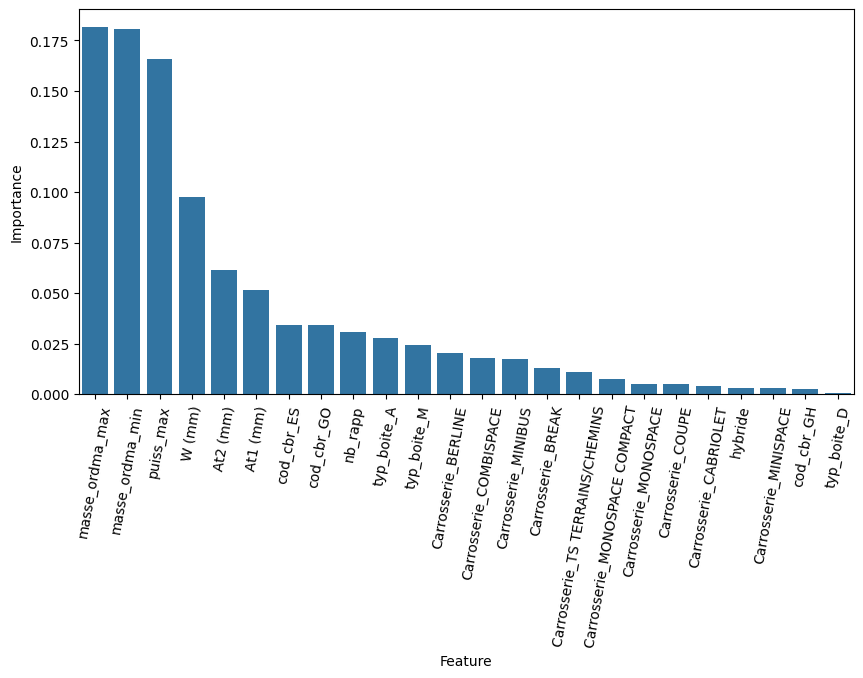

In [ ]:
print(importance_df)
plt.figure(figsize=(10,5))
sns.barplot(importance_df["Importance"])
plt.xticks(rotation=80)


Le feature importance permet montrer quelles sont les variables les plus utiles pour l'apprentissage du modèle. Ainsi, juste pour tester, j'ai selectionné les variables les plus importantes et je me suis débarrassé des autres pour voir si le modèle était plus performant en réduisant sa complexité.

In [ ]:
#'cod_cbr','Carrosserie',typ_boite
#X = df[['masse_ordma_min','masse_ordma_max',"puiss_max","W (mm)","At1 (mm)","At2 (mm)",'nb_rapp']]
X = df2[['masse_ordma_min','masse_ordma_max',"puiss_max","W (mm)","At1 (mm)","At2 (mm)",'cod_cbr_ES','cod_cbr_GO',"nb_rapp"]]
y = df2["category"]

#Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=64)

#Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

###LogisticRegression
'''
clf = LogisticRegression(C=1)
clf.fit(X_train_scaler,y_train)

print("LOGISTIC REGRESSION")
print("Logistic Regression train: ",clf.score(X_train_scaler,y_train))
print("Logistic Regression test : ",clf.score(X_test_scaler,y_test))

y_pred = clf.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))
'''

#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaler,y_train)

print("\n\n")
print("KNN")
print("KNN train : ",knn.score(X_train_scaler,y_train))
print("KNN test : ",knn.score(X_test_scaler,y_test))

y_pred = knn.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#RandomForest
rforest = RandomForestClassifier(n_jobs = -1,random_state = 64)
rforest.fit(X_train_scaler,y_train)

print("\n\n")
print("RANDOM FOREST")
print("Random Forest train : ",rforest.score(X_train_scaler,y_train))
print("Random Forest test : ",rforest.score(X_test_scaler,y_test))

y_pred = rforest.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))






KNN
KNN train :  0.8940200042562247
KNN test :  0.8153191489361702
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       157
           1       0.84      0.83      0.84       330
           2       0.79      0.81      0.80       295
           3       0.82      0.80      0.81       215
           4       0.76      0.79      0.77       149
           5       0.94      0.80      0.86        20
           6       1.00      1.00      1.00         9

    accuracy                           0.82      1175
   macro avg       0.85      0.84      0.85      1175
weighted avg       0.82      0.82      0.82      1175

col_0       0    1    2    3    4   5  6
category                                
0         130   23    3    1    0   0  0
1          22  274   29    3    2   0  0
2           3   22  239   18   13   0  0
3           0    6   18  172   19   0  0
4           1    0   12   17  118   1  0
5           0    0    0    0    4  16  0
6    

In [ ]:
importance_list = list(importance_df.index)
print(importance_list)

list_knn_train = []
list_knn_test = []
list_rf_train = []
list_rf_test = []

for i in range(len(importance_list)):
  importance_sous_list = importance_list[:i+1]

  X = df2[importance_sous_list]
  y = df2["category"]

  #Split
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=64)

  #Scaler
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaler = scaler.transform(X_train)
  X_test_scaler = scaler.transform(X_test)


  #KNN
  knn = KNeighborsClassifier(n_neighbors=5)
  knn.fit(X_train_scaler,y_train)

  list_knn_train.append(knn.score(X_train_scaler,y_train))
  list_knn_test.append(knn.score(X_test_scaler,y_test))


  #RandomForest
  rforest = RandomForestClassifier(n_jobs = -1,random_state = 64)
  rforest.fit(X_train_scaler,y_train)

  list_rf_train.append(rforest.score(X_train_scaler,y_train))
  list_rf_test.append(rforest.score(X_test_scaler,y_test))



['masse_ordma_max', 'masse_ordma_min', 'puiss_max', 'W (mm)', 'At2 (mm)', 'At1 (mm)', 'cod_cbr_ES', 'cod_cbr_GO', 'nb_rapp', 'typ_boite_A', 'typ_boite_M', 'Carrosserie_BERLINE', 'Carrosserie_COMBISPACE', 'Carrosserie_MINIBUS', 'Carrosserie_BREAK', 'Carrosserie_TS TERRAINS/CHEMINS', 'Carrosserie_MONOSPACE COMPACT', 'Carrosserie_MONOSPACE', 'Carrosserie_COUPE', 'Carrosserie_CABRIOLET', 'hybride', 'Carrosserie_MINISPACE', 'cod_cbr_GH', 'typ_boite_D']


0.8893617021276595
2


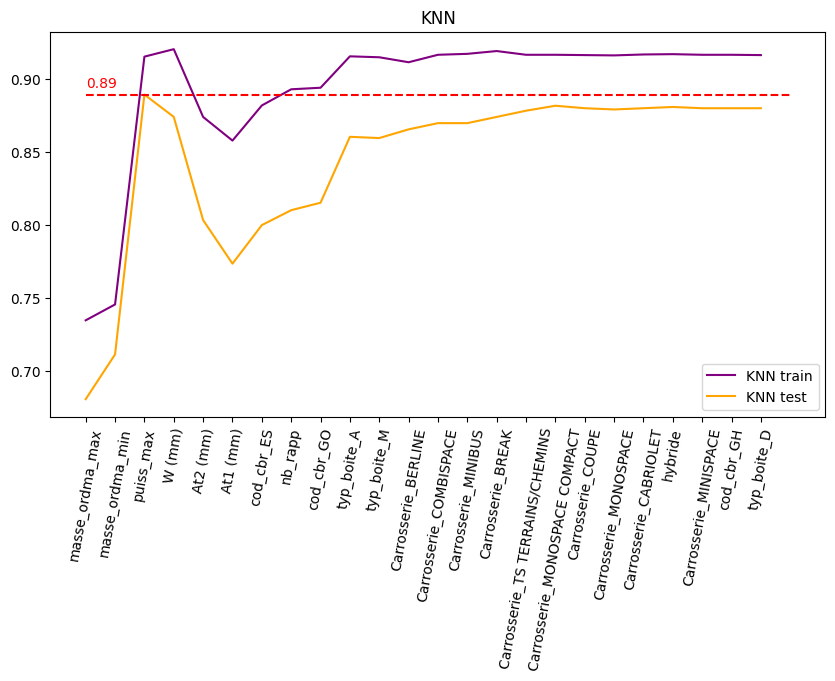

In [ ]:
ticks = [i for i in range(len(importance_list))]


accuracy_max = max(list_knn_test)
accuracy_argmax = np.argmax(list_knn_test)
print(accuracy_max)
print(accuracy_argmax)

plt.figure(figsize=(10,5))
plt.plot(list_knn_train,label="KNN train",color='purple')
plt.plot(list_knn_test,label="KNN test",color="orange")
plt.plot([0,len(importance_list)],[accuracy_max,accuracy_max],'r--')
plt.title("KNN")
plt.legend()
plt.xticks(ticks=ticks, labels = importance_list,rotation =80)
plt.text(0,accuracy_max+0.005,round(accuracy_max,2),color='red')
plt.show()

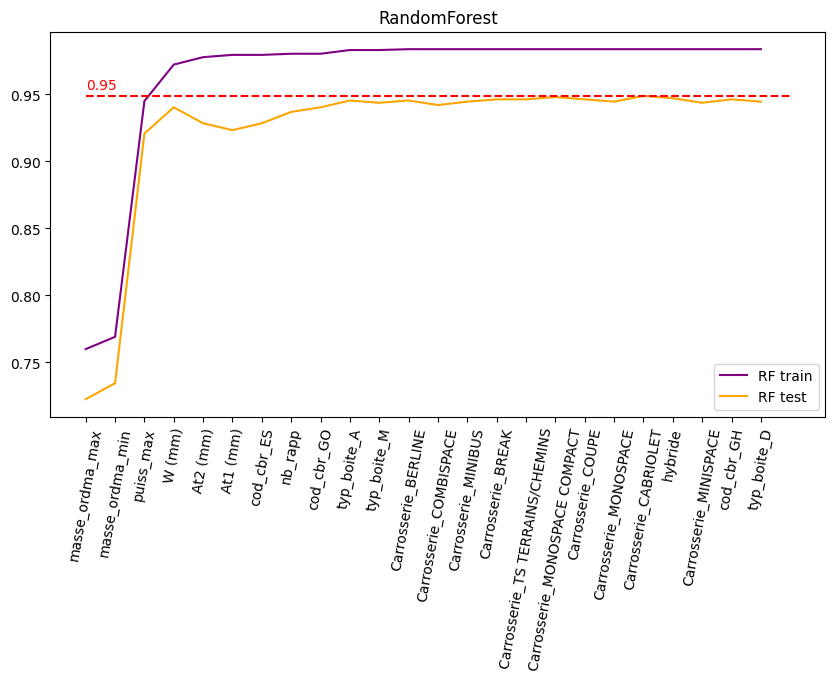

In [ ]:
accuracy_max = max(list_rf_test)
accuracy_argmax =np.argmax(list_rf_test)

# plt.figure(figsize=(10,5))
# plt.plot(list_knn_train,label="KNN train")
# plt.plot(list_knn_test,label="KNN test")
# plt.title("KNN")
# plt.legend()


plt.figure(figsize=(10,5))
plt.plot(list_rf_train,label="RF train",color="purple")
plt.plot(list_rf_test,label="RF test",color="orange")
plt.plot([0,len(importance_list)],[accuracy_max,accuracy_max],'r--')
plt.title("RandomForest")
plt.legend()
plt.xticks(ticks=ticks, labels = importance_list,rotation =80)
plt.text(0,accuracy_max+0.005,round(accuracy_max,2),color='red')
plt.show()

Le modèle n'est finalement pas plus performant. Mais j'étais curieux de voir les résultats. Ainsi je ne vais pas me débarrasser des varibles soit disant moins importantes.

Etant donné que le RandomForest est le modèle le plus performant utilisé, on va conserver ce modèle et essayer d'améliorer au maximum ce modèle. Pour cela, on va faire un GridSearchCV pour sélectionner la meilleur combinaison d'hyperparamètres.

Les hyperparamètres testés seront le nombres d'estimateurs et le criterion.

In [ ]:
from sklearn.model_selection import GridSearchCV

parametres = {
    'n_estimators':[50,100,150,250,500]
}
parametres = {
    'n_estimators':[10,50,100,150,200,300,500,750,1000],
    'criterion':["gini","entropy"],
}

rforest = RandomForestClassifier(n_jobs=-1,random_state=64)
grid_clf = GridSearchCV(estimator=rforest,param_grid = parametres)

In [ ]:
#'cod_cbr','Carrosserie',typ_boite
X = df2.drop(["category"],axis=1)
y = df2["category"]

#Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=64)

#Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

grille = grid_clf.fit(X_train_scaler,y_train)

print(pd.DataFrame.from_dict(grille.cv_results_).loc[:,['params','mean_test_score']])

                                            params  mean_test_score
0        {'criterion': 'gini', 'n_estimators': 10}         0.939987
1        {'criterion': 'gini', 'n_estimators': 50}         0.945094
2       {'criterion': 'gini', 'n_estimators': 100}         0.944030
3       {'criterion': 'gini', 'n_estimators': 150}         0.944456
4       {'criterion': 'gini', 'n_estimators': 200}         0.943605
5       {'criterion': 'gini', 'n_estimators': 300}         0.945520
6       {'criterion': 'gini', 'n_estimators': 500}         0.944882
7       {'criterion': 'gini', 'n_estimators': 750}         0.944669
8      {'criterion': 'gini', 'n_estimators': 1000}         0.944882
9     {'criterion': 'entropy', 'n_estimators': 10}         0.938924
10    {'criterion': 'entropy', 'n_estimators': 50}         0.942754
11   {'criterion': 'entropy', 'n_estimators': 100}         0.944882
12   {'criterion': 'entropy', 'n_estimators': 150}         0.944243
13   {'criterion': 'entropy', 'n_estimators': 20

category
1    1571
2    1441
3    1154
0     783
4     780
5     104
6      41
Name: count, dtype: int64


<Axes: xlabel='category', ylabel='count'>

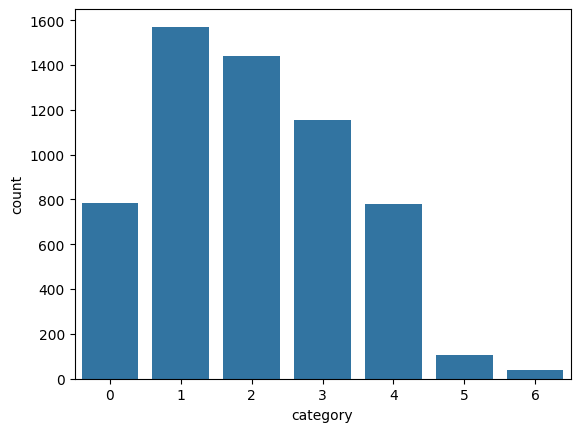

In [ ]:
import seaborn as sns

print(df2["category"].value_counts())

sns.barplot(df2["category"].value_counts())

Etant donné que la répartition des classes n'est pas égale, il y a beaucoup moins d'éléments des classes 5 et 6 que les autres, j'essaye d'utiliser un resampling pour avoir un dataset plus balancé. Cette méthode permettra de diminuer l'oversampling présent notre modèle d'apprentissage.

Pour cela on va utiliser la méthode de resampling nommée SMOTE. Comme pour l'instant je n'ai pas accès à la bibliothèque imblearn (il faut que je l'installe), j'ai mis en commentaire cette partie que je ferai plus tard.

In [ ]:
from imblearn.over_sampling import SMOTE



#'cod_cbr','Carrosserie',typ_boite
X = df2.drop(["category"],axis=1)
y = df2["category"]


#Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=64)

#Scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

#Smote
smote = SMOTE(random_state=64)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaler, y_train)

#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote,y_train_smote)

print("\n\n")
print("KNN")
print("KNN train : ",knn.score(X_train_smote,y_train_smote))
print("KNN test : ",knn.score(X_test_scaler,y_test))

y_pred = knn.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

#RandomForest
rforest = RandomForestClassifier(n_jobs = -1,random_state = 64)
rforest.fit(X_train_smote,y_train_smote)

print("\n\n")
print("RANDOM FOREST")
print("Random Forest train : ",rforest.score(X_train_smote,y_train_smote))
print("Random Forest test : ",rforest.score(X_test_scaler,y_test))

y_pred = rforest.predict(X_test_scaler)
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))





KNN
KNN train :  0.9555657879590193
KNN test :  0.8842553191489362
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       157
           1       0.91      0.87      0.89       330
           2       0.84      0.86      0.85       295
           3       0.86      0.89      0.87       215
           4       0.96      0.93      0.94       149
           5       1.00      0.85      0.92        20
           6       1.00      1.00      1.00         9

    accuracy                           0.88      1175
   macro avg       0.92      0.90      0.91      1175
weighted avg       0.89      0.88      0.88      1175

col_0       0    1    2    3    4   5  6
category                                
0         144   10    3    0    0   0  0
1          17  286   24    3    0   0  0
2           3   17  254   20    1   0  0
3           0    2   19  191    3   0  0
4           0    1    2    8  138   0  0
5           0    0    0    1    2  17  0
6    

In [ ]:
joblib.dump(knn, "KNN_smote.pkl")
joblib.dump(rforest, "RF_smote.pkl")

files.download("KNN_smote.pkl")
files.download("RF_smote.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Deep Learning**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model



In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'][2:], label='loss')
    plt.plot(history.history['val_loss'][2:], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             175 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 175 (700.00 B)

 Trainable params: 175 (700.00 B)

 Non-trainable params: 0 (0.00 B)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[4 2 0 ... 4 2 0]
              precision    recall  f1-score   support

           0       0.63      0.81      0.71       157
           1       0.65      0.58      0.61       330
           2       0.61      0.56      0.58       295
           3       0.73      0.80      0.76       215
           4       0.88      0.83      0.85       149
           5       0.63      0.95      0.76        20
           6       1.00      0.89      0.94         9

    accuracy                           0.68      1175
   macro avg       0.73      0.77      0.75      1175
weighted avg       0.68      0.68      0.68      1175

col_0       0    1    2    3    4   5  6
category                                
0         127   27    3    0    0   0  0
1          65  190   74    0    1   0  0
2          10   67  164   53    1   0  0
3           0    8   21  172   14   0  0
4           0    0    5   11  123  10  0
5           0    0    0    0    1  19  0
6           0    0

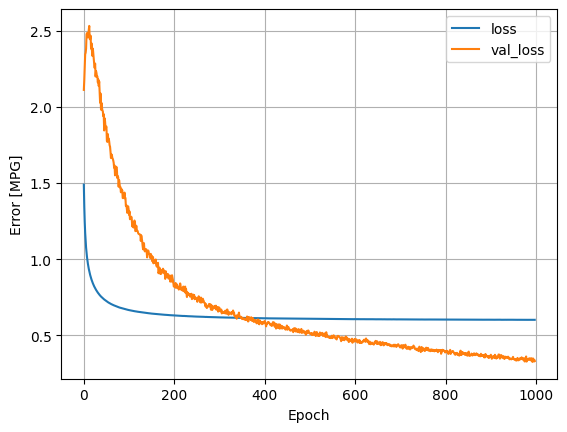

In [ ]:
num_features = X_train_scaler.shape[1]

input_layer = Input(shape=(num_features,))
output_layer = Dense(units = 7,activation="softmax")(input_layer)

# Création du modèle
linear_model = Model(inputs=input_layer, outputs=output_layer,metrics=['accuracy'])

# Affichage du résumé du modèle
linear_model.summary()

opt = tf.optimizers.Adam(learning_rate=0.001)
linear_model.compile(loss='sparse_categorical_crossentropy',optimizer = opt)

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',   # Surveille la perte sur l'ensemble de validation
    patience=100,
    restore_best_weights=True  # Restaure les poids du meilleur modèle
)

linear_model_history = linear_model.fit(X_train_smote,y_train_smote,epochs=1000,batch_size=64,validation_split=0.2,callbacks=[early_stopping],verbose=0)

plot_loss(linear_model_history)

y_pred_probs = linear_model.predict(X_test_scaler)
y_pred = np.argmax(y_pred_probs, axis=1)

print(y_pred)

print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

In [ ]:
#help(Input)
num_features = X_train_scaler.shape[1]
print("Nombre de features : ",num_features)

input_layer = Input(shape=(num_features,))
x = Dense(units = 128,activation="relu")(input_layer)
x = Dense(units = 64,activation="relu")(x)
output_layer = Dense(units = 7,activation="softmax")(x)

# Création du modèle
linear_model = Model(inputs=input_layer, outputs=output_layer,metrics=['accuracy'])

# Affichage du résumé du modèle
linear_model.summary()


Nombre de features :  24


Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_35 (InputLayer)          │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_77 (Dense)                     │ (None, 128)                 │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_78 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,911 (46.53 KB)

 Trainable params: 11,911 (46.53 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
opt = tf.optimizers.Adam(learning_rate=0.001)
linear_model.compile(loss='sparse_categorical_crossentropy',optimizer = opt)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',   # Surveille la perte sur l'ensemble de validation
    patience=100,
    restore_best_weights=True  # Restaure les poids du meilleur modèle
)

linear_model_history = linear_model.fit(X_train_smote,y_train_smote,epochs=1000,batch_size=64,validation_split=0.2,callbacks=[early_stopping],verbose=0)

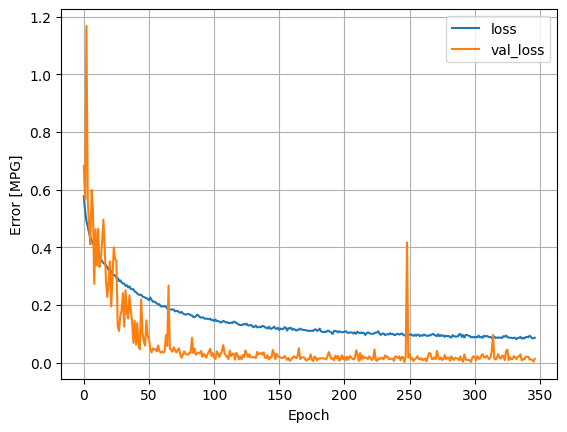

In [ ]:
plot_loss(linear_model_history)

In [ ]:
y_pred_probs = linear_model.predict(X_test_scaler)
y_pred = np.argmax(y_pred_probs, axis=1)

print(y_pred)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[4 2 0 ... 4 1 1]


In [ ]:
print(classification_report(y_test, y_pred))
print(pd.crosstab(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       157
           1       0.93      0.89      0.91       330
           2       0.90      0.89      0.90       295
           3       0.88      0.95      0.91       215
           4       0.96      0.91      0.94       149
           5       0.89      0.85      0.87        20
           6       1.00      1.00      1.00         9

    accuracy                           0.91      1175
   macro avg       0.92      0.92      0.92      1175
weighted avg       0.91      0.91      0.91      1175

col_0       0    1    2    3    4   5  6
category                                
0         148    6    3    0    0   0  0
1          21  293   14    2    0   0  0
2           1   15  262   17    0   0  0
3           0    0    9  204    2   0  0
4           0    1    2    8  136   2  0
5           0    0    0    0    3  17  0
6           0    0    0    0    0   0  9
